# Titanic Survival using Logistic Regression

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following: 

- Pclass:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex:    Sex	
- Age:    Age in years	
- Sibsp:	# of siblings / spouses aboard the Titanic	
- Parch:	# of parents / children aboard the Titanic	
- Ticket:	Ticket number	
- Fare:	Passenger fare	
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


- Target class: Survived: Survival	(0 = No, 1 = Yes)


# STEP #0: LIBRARIES IMPORT


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# STEP #1: IMPORT DATASET

In [3]:
# read the data using pandas dataframe
training_set = pd.read_csv('train.csv')

In [4]:
# Show the data head!
training_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Show the data head!
training_set.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# STEP #2: EXPLORE/VISUALIZE DATASET

In [6]:
# Let's count the number of survivors and non-survivors

survived    = training_set[training_set['Survived']==1]
no_survived = training_set[training_set['Survived']==0]


In [7]:
# Count the survived and deceased 
print("Total =", len(training_set))

print("Number of Survived passengers =", len(survived))
print("Percentage Survived =", 1.*len(survived)/len(training_set)*100.0, "%")
 
print("Did not Survive =", len(no_survived))
print("Percentage who did not survive =", 1.*len(no_survived)/len(training_set)*100.0, "%")
 
        

Total = 891
Number of Survived passengers = 342
Percentage Survived = 38.38383838383838 %
Did not Survive = 549
Percentage who did not survive = 61.61616161616161 %


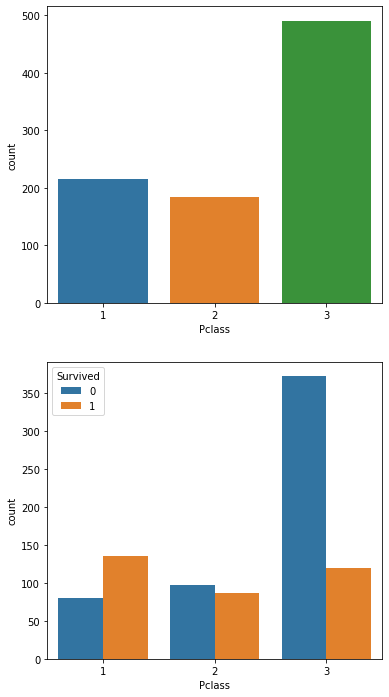

In [8]:
# Bar Chart to indicate the number of people survived based on their class
# If you are a first class, you have a higher chance of survival
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = training_set)
plt.subplot(212)
sns.countplot(x = 'Pclass', hue = 'Survived', data=training_set)


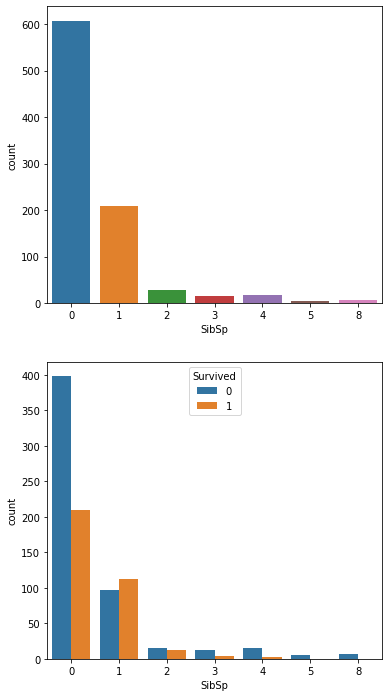

In [9]:
# Bar Chart to indicate the number of people survived based on their siblings status
# If you have 1 siblings (SibSp = 1), you have a higher chance of survival compared to being alone (SibSp = 0)
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'SibSp', data=training_set)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data=training_set)

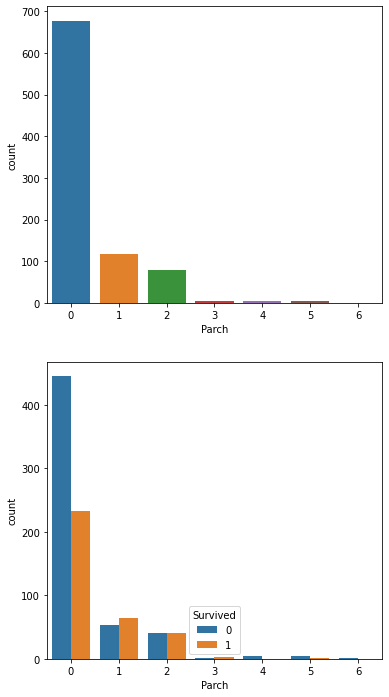

In [10]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Parch', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Parch', hue = 'Survived', data=training_set)

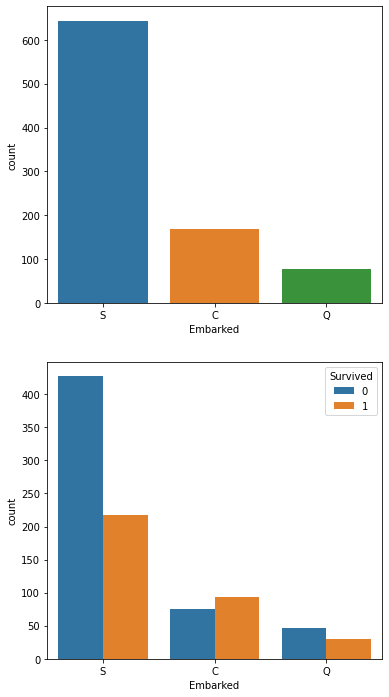

In [11]:
# Bar Chart to indicate the number of people survived based on the port they emparked from
# Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
# If you embarked from port "C", you have a higher chance of survival compared to other ports!
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Embarked', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Embarked', hue = 'Survived', data=training_set)

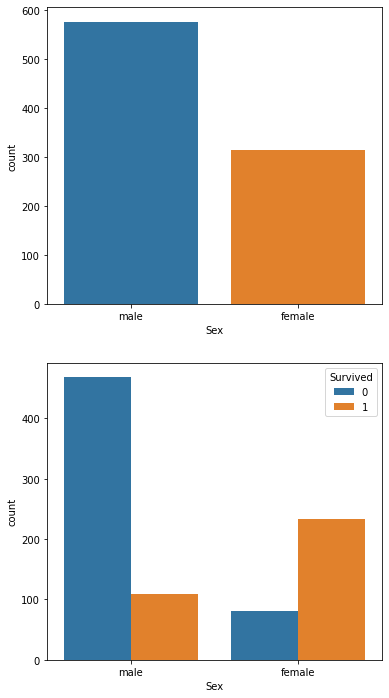

In [12]:
# Bar Chart to indicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival compared to other ports!
plt.figure(figsize=[6,12])
plt.subplot(211)
sns.countplot(x = 'Sex', data=training_set)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data=training_set)

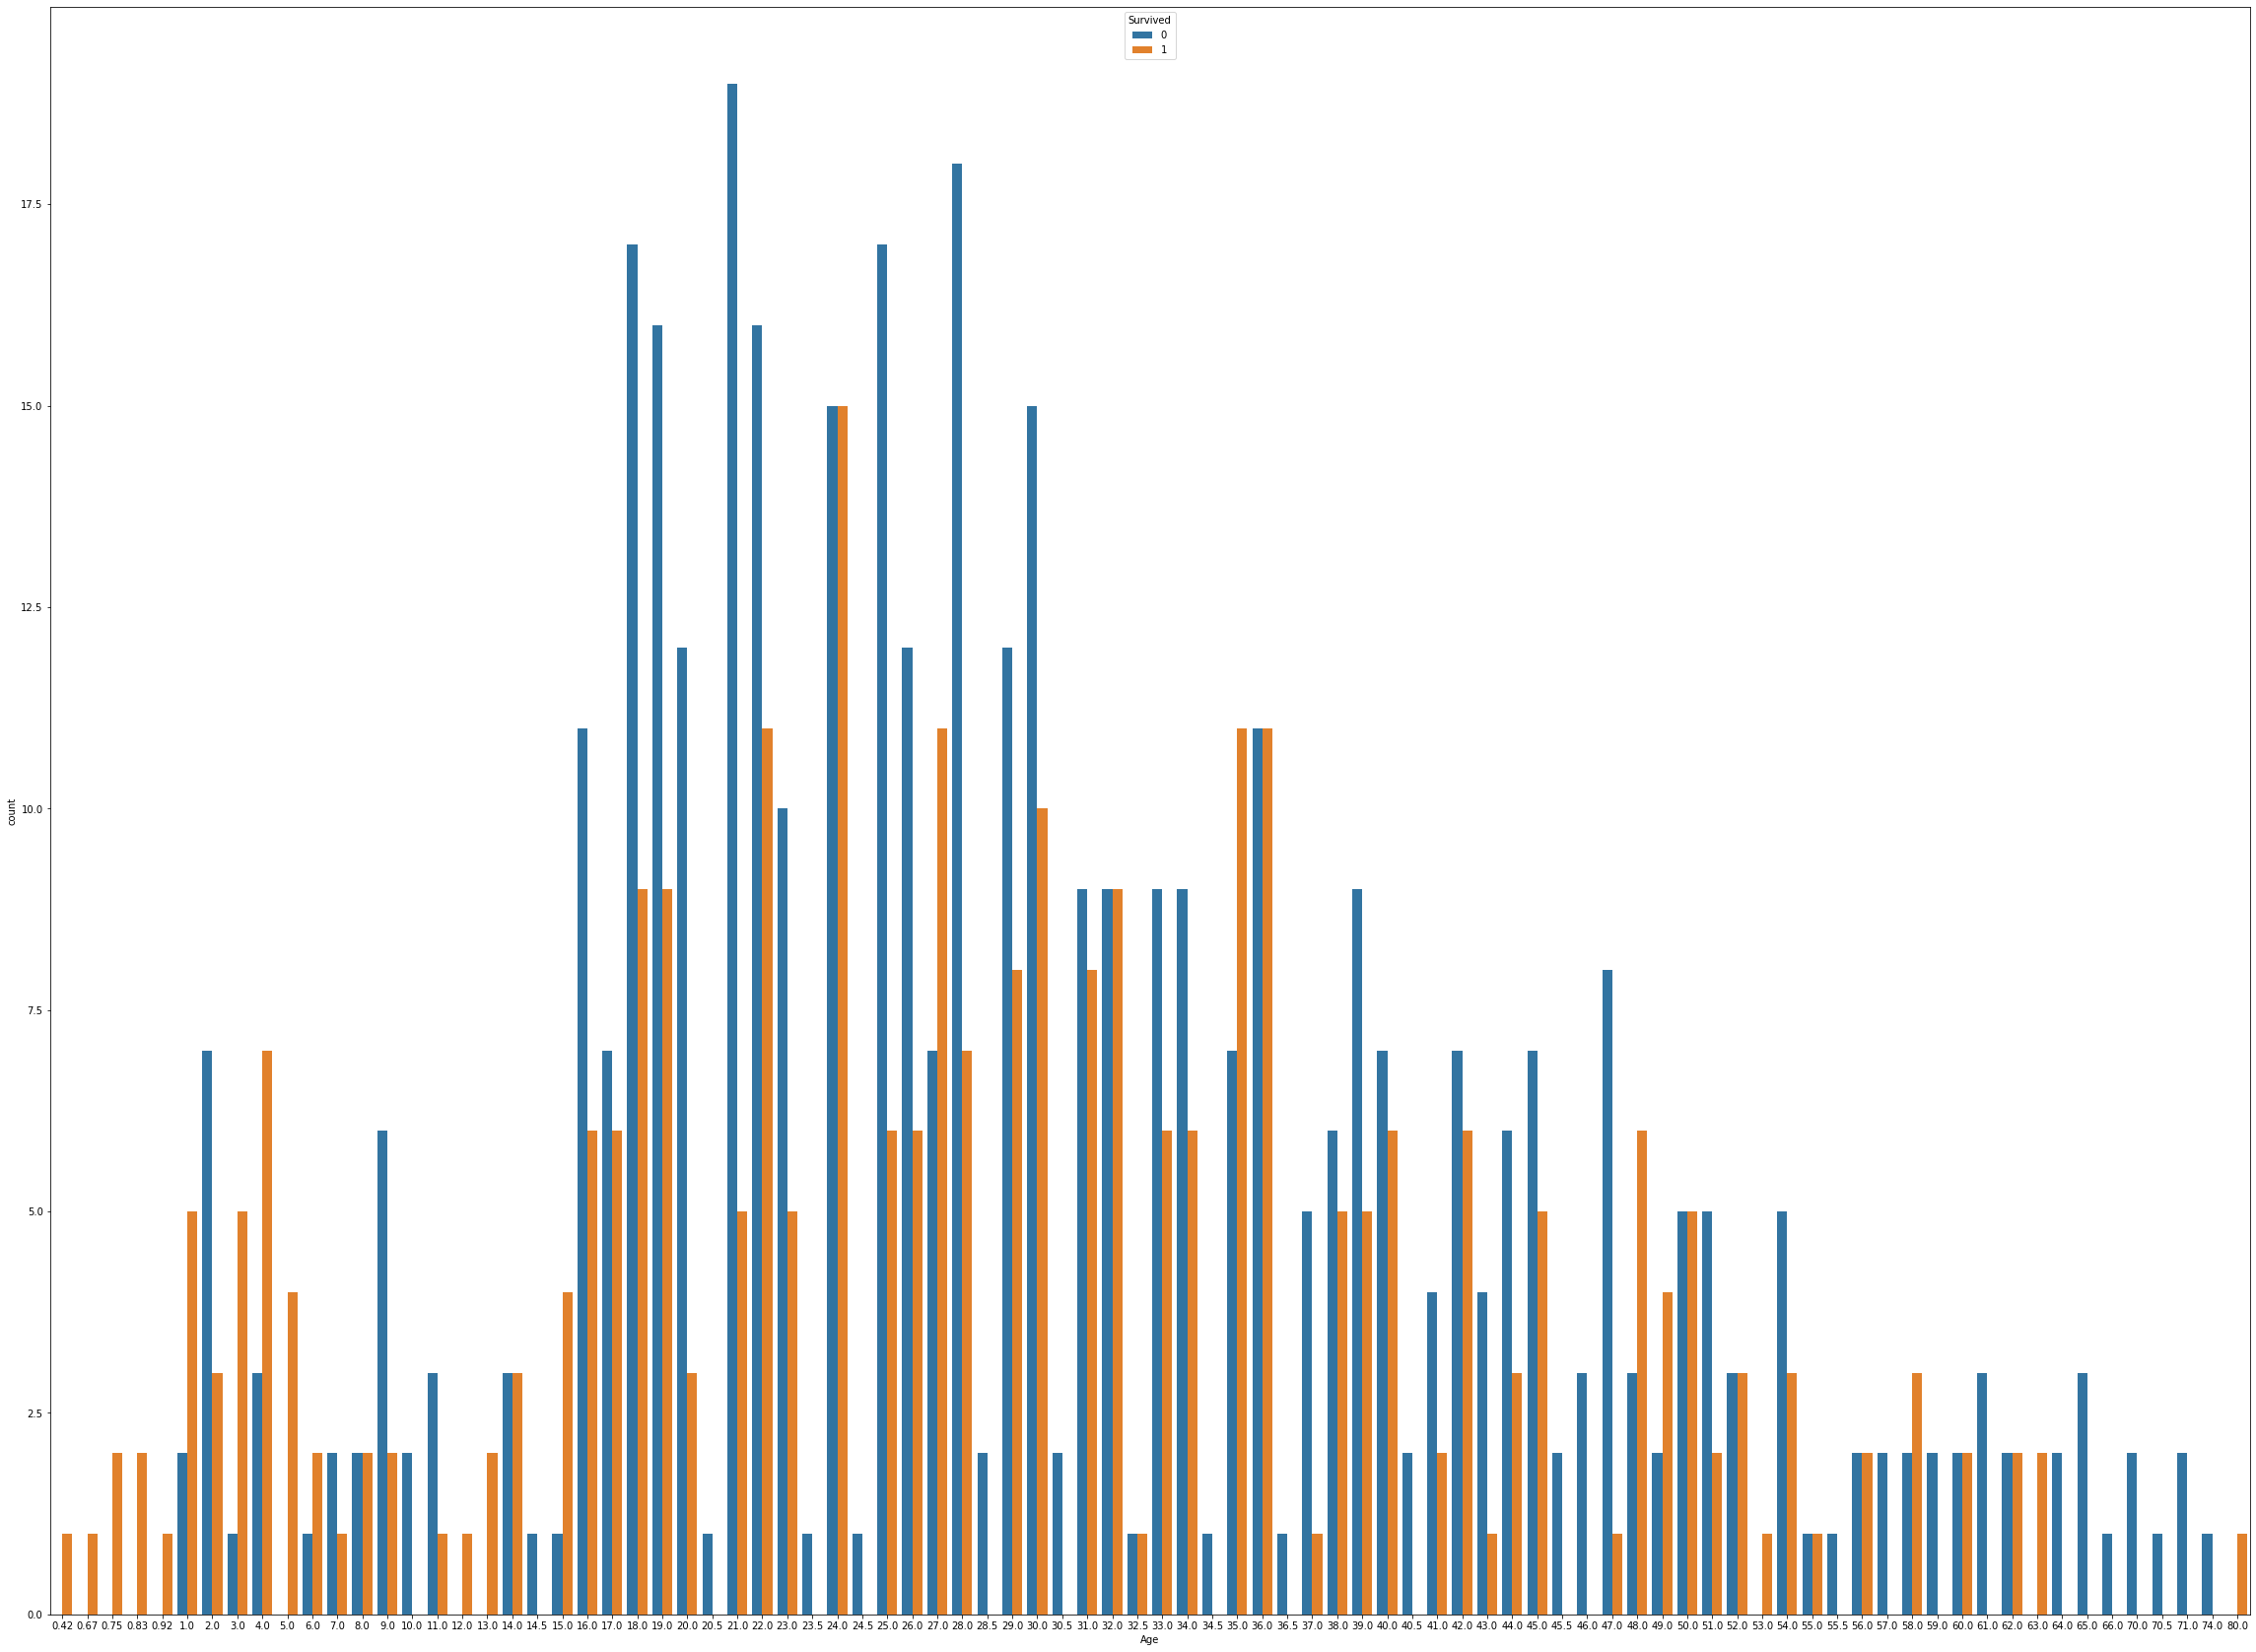

In [13]:
# Bar Chart to indicate the number of people survived based on their age
# If you are a baby, you have a higher chance of survival
plt.figure(figsize=(40,30))
sns.countplot(x = 'Age', hue = 'Survived', data=training_set)

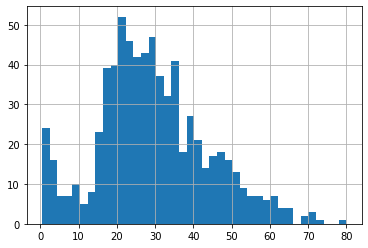

In [14]:
# Age Histogram 
training_set['Age'].hist(bins = 40)

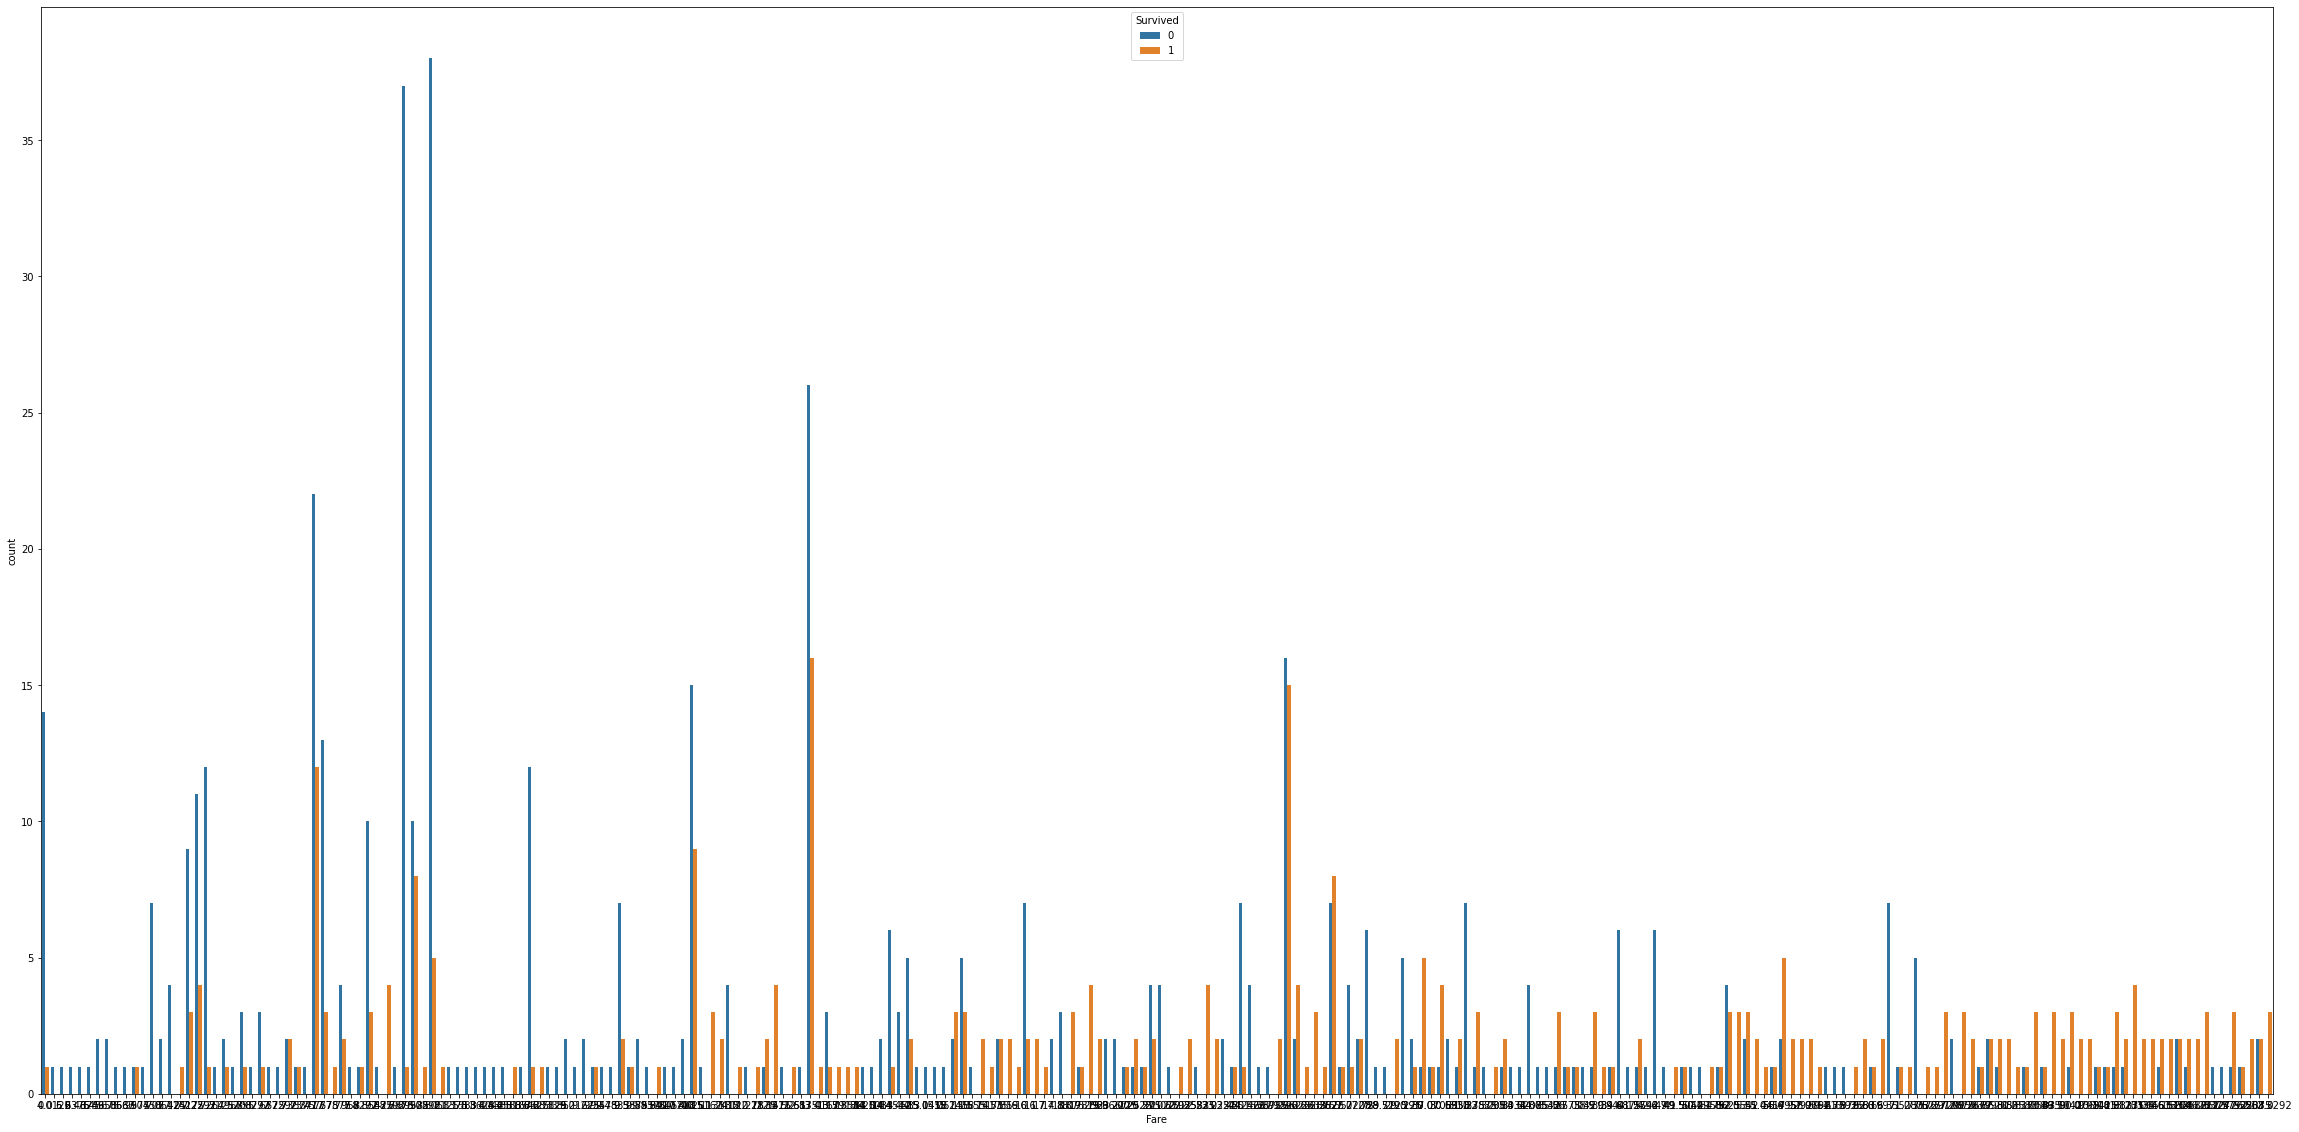

In [15]:
# Bar Chart to indicate the number of people survived based on their fare
# If you pay a higher fare, you have a higher chance of survival
plt.figure(figsize=(40,20))
sns.countplot(x = 'Fare', hue = 'Survived', data=training_set)

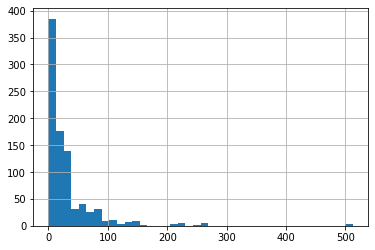

In [16]:
# Fare Histogram 
training_set['Fare'].hist(bins = 40)

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

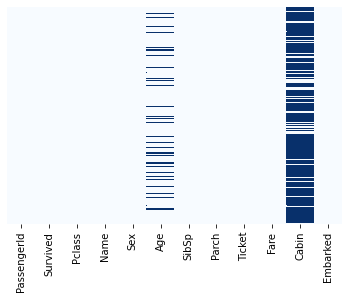

In [17]:
# Let's explore which dataset is missing
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [18]:
# Let's drop the cabin coloumn and test with inplace = true and false
training_set.drop('Cabin',axis=1,inplace=False)
training_set.drop('Cabin',axis=1,inplace=True)

In [19]:
#Let's drop the embarked as well
training_set.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'],axis=1,inplace=True)

In [20]:
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


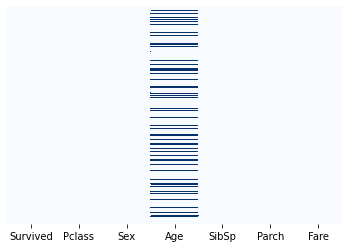

In [21]:
# Let's view the data one more time!
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")


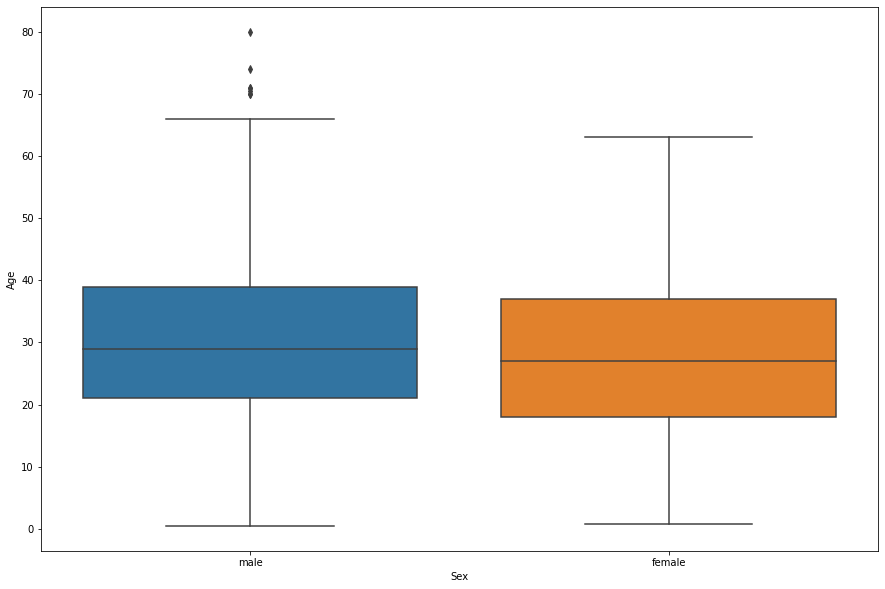

In [22]:
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize=(15, 10))
sns.boxplot(x='Sex', y='Age',data=training_set)

In [23]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex is 'male': 
            return 29
        else:
            return 25
    else:
        return age
        

In [24]:
training_set['Age'] = training_set[['Age','Sex']].apply(Fill_Age,axis=1)

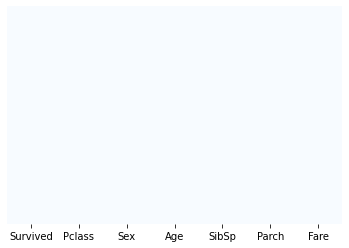

In [25]:
# Let's view the data one more time!
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [26]:
pd.get_dummies(training_set['Sex'])
# You just need one column only to represent male or female


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [27]:
male = pd.get_dummies(training_set['Sex'], drop_first = True)


In [28]:
# first let's drop the embarked and sex 
training_set.drop(['Sex'], axis=1, inplace=True)

In [29]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,25.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [30]:
# Now let's add the encoded column male again
training_set = pd.concat([training_set, male], axis=1)

In [31]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


# STEP#4: MODEL TRAINING

In [32]:
#Let's drop the target coloumn before we do train test split
X = training_set.drop('Survived',axis=1).values
y = training_set['Survived'].values


In [33]:
from sklearn.model_selection import train_test_split


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [35]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# STEP#5: MODEL TESTING

In [36]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

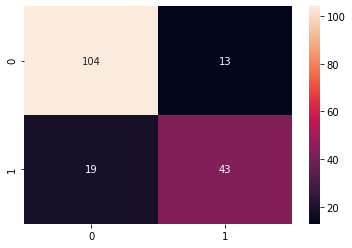

In [39]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

